In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler

In [2]:
diabetes_data = load_diabetes()

In [3]:
diabetes_data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df = pd.DataFrame(diabetes_data.data, columns = diabetes_data.feature_names)

In [5]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
df['Target']=diabetes_data.target

In [7]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [8]:
x=df['bmi'] # Using only BMI
y=df['Target']

In [13]:
def locally_weighted_lr(x,y,tau):
    
    # Number of Data Pointa 
    m=x.shape[0]
    y_pred=np.zeros(m)
    
    for i in range(m):
        xi=x[i,:] # Current Data Point
        
        weights = np.exp(-np.sum((x-xi)**2, axis = 1)/(2*tau**2))
        w=np.diag(weights) # Weighted Feature Matrix
        
        x_tw_x=x.T @ w @ x
        x_tw_y=x.T @ w @ y
        
        theta=np.linalg.pinv(x_tw_x) @ x_tw_y #Regression Coefficients
        
        y_pred[i]=xi @ theta
        
    return y_pred
        

In [10]:
tau=0.5

In [11]:
x = x.values.reshape(-1, 1) # Converted to numpy

# Standardize the feature
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
y_pred = locally_weighted_lr(x_scaled, y, tau)

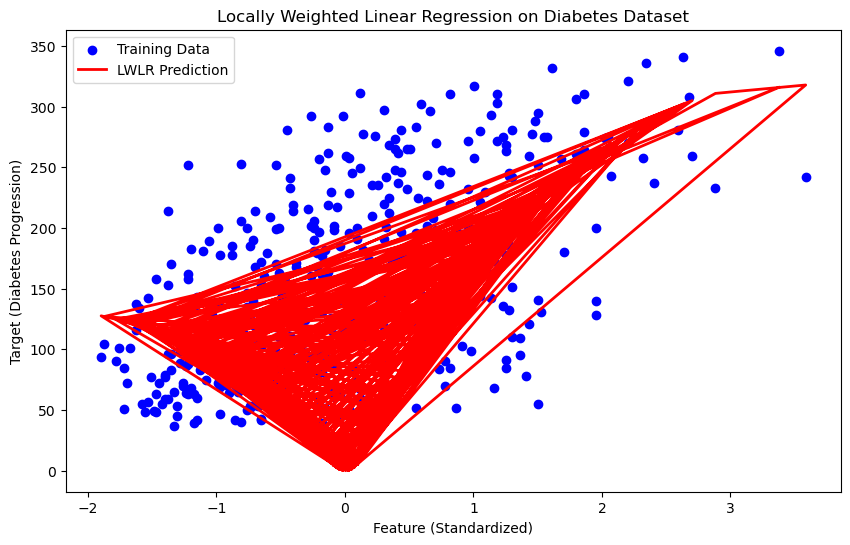

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled, y, color='blue', label='Training Data')
plt.plot(x_scaled, y_pred, color='red', label='LWLR Prediction', linewidth=2)
plt.xlabel('Feature (Standardized)')
plt.ylabel('Target (Diabetes Progression)')
plt.title('Locally Weighted Linear Regression on Diabetes Dataset')
plt.legend()
plt.show()

In [16]:
mse = np.mean((y_pred - y)**2)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 9971.86
